In [1]:
import sqlite3

# Create or connect to the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
''')

# Insert sample data
sample_data = [
    ('Laptop', 5, 999.99, '2023-01-15'),
    ('Phone', 10, 699.99, '2023-01-15'),
    ('Tablet', 7, 349.99, '2023-01-16'),
    ('Laptop', 3, 999.99, '2023-01-17'),
    ('Phone', 8, 699.99, '2023-01-18'),
    ('Monitor', 4, 249.99, '2023-01-19'),
    ('Tablet', 2, 349.99, '2023-01-20')
]

cursor.executemany('INSERT INTO sales (product, quantity, price, sale_date) VALUES (?, ?, ?, ?)', sample_data)
conn.commit()

=== Sales by Product ===
   product  total_qty   revenue
0    Phone         18  12599.82
1   Laptop          8   7999.92
2   Tablet          9   3149.91
3  Monitor          4    999.96

=== Overall Sales Summary ===
   total_transactions  total_items_sold  total_revenue  average_item_price
0                   7                39       24749.61          621.418571


<Figure size 1000x500 with 0 Axes>

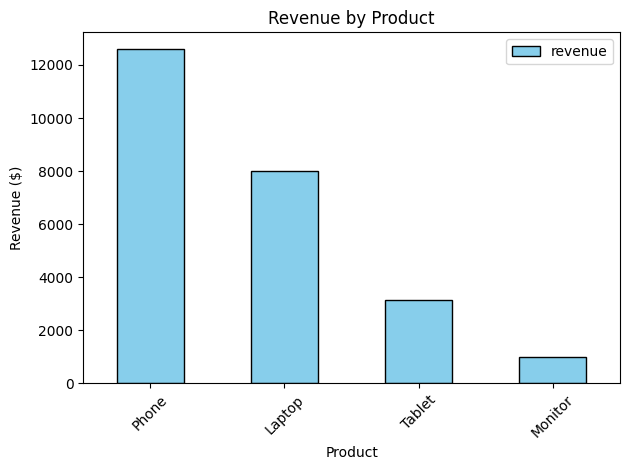

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('sales_data.db')

# Query 1: Get total quantity and revenue by product
query1 = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

# Query 2: Get overall summary stats
query2 = """
SELECT
    COUNT(*) AS total_transactions,
    SUM(quantity) AS total_items_sold,
    SUM(quantity * price) AS total_revenue,
    AVG(price) AS average_item_price
FROM sales
"""

# Load data into pandas DataFrames
df_products = pd.read_sql_query(query1, conn)
df_summary = pd.read_sql_query(query2, conn)

# Close the connection
conn.close()

# Display the results
print("=== Sales by Product ===")
print(df_products)
print("\n=== Overall Sales Summary ===")
print(df_summary)

# Create a bar chart for revenue by product
plt.figure(figsize=(10, 5))
df_products.plot(kind='bar', x='product', y='revenue',
                 title='Revenue by Product',
                 color='skyblue',
                 edgecolor='black')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig('sales_chart.png')

# Show the chart
plt.show()